#가중치를 0으로 초기화 하면 어떻게 될 것인가?



*   신경망을 훈련시킬 때 변수를 임의값으로 초기화 하는 것은 중요
*   로지스틱 회귀인 경우 모두 0으로 초기화 하여도 괜찮지만, 
신경망에서 모두 0으로 초기화 하고 경사 하강법을 적용하면 작동이 잘되지 않음


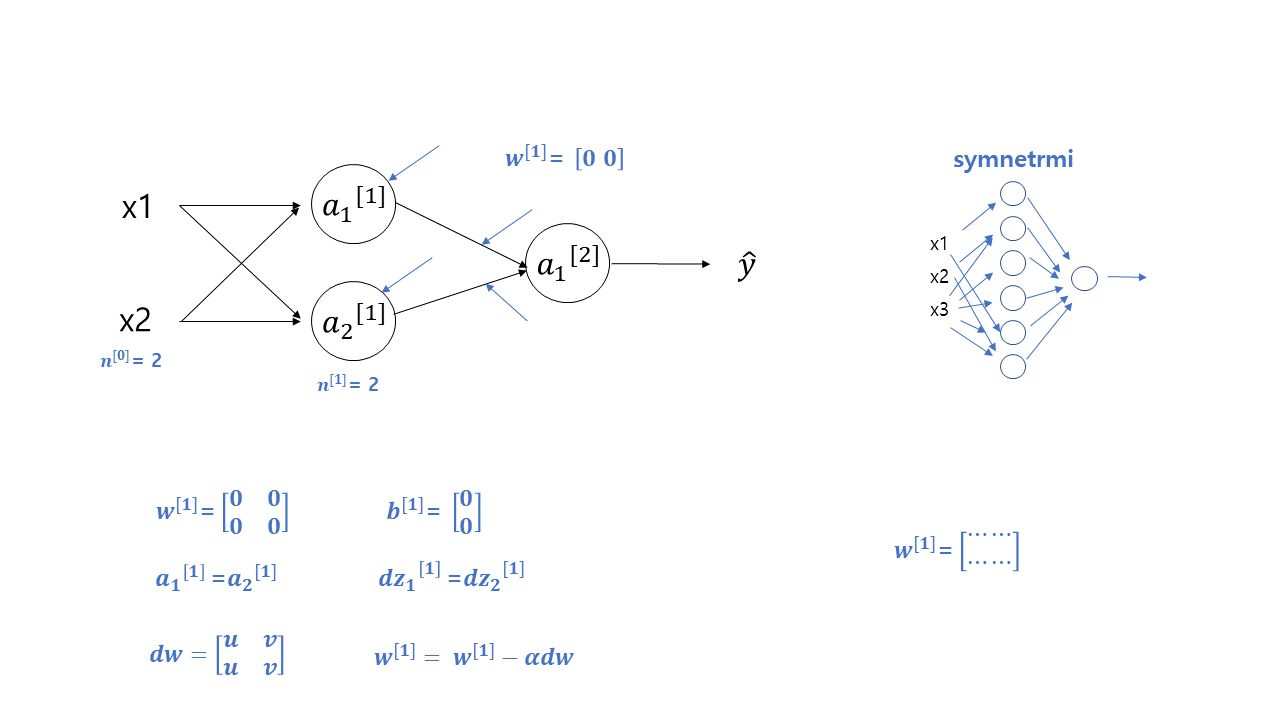

##올바르게 동작하지 않는 이유를 알아본다



*   $n^{[0]} = 2$, $n^{[1]}$ = 2 두 개의 은닉층이 있다



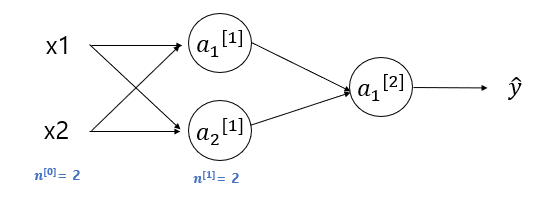

*   은닉층에 관한 행렬



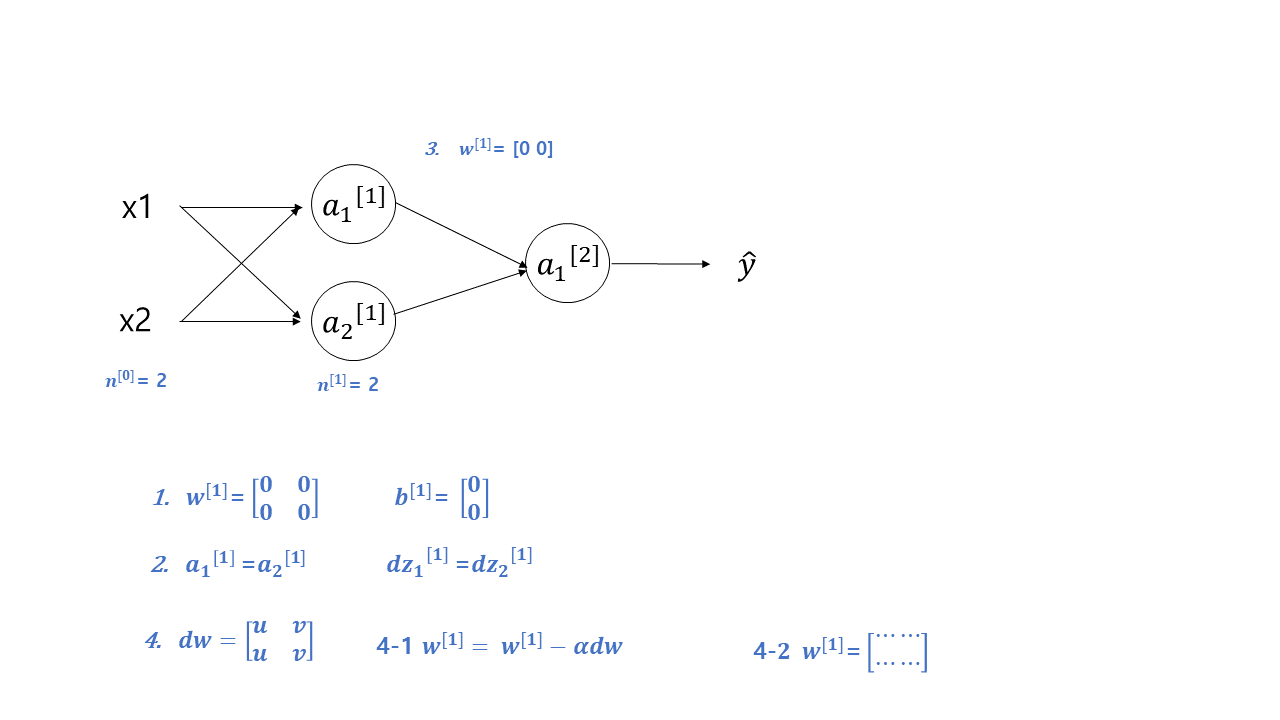

1.  $w^{[1]}$은 (2,2)행렬이며, 이 값을 모두 0으로 초기화 하면 모두 0인 (2,2) 행렬이 되고, $b^{[1]}$또한 0으로 초기화 한다
2.  w까지 모두 0으로 초기하게 되면
*    $a^{[1]}_1$와 $a^{[1]}_2$이 같은 값을 가지게 된다
*   back propagation를 계산할 때 $dz^{[1]}_1$과$dz^{[1]}_2$도 같아 진다

  (대칭적인 결과를 가진다)

3. 두 은닉 유닛이 같은 값으로 초기화되기 때문에 가중치의 결과값이 $w^{[2]}$는 [0 0]으로 항상 같다는 것이다

*   $a^{[1]}_1$와 $a^{[1]}_2$이  완전히 같아 진다(완전 대칭)

4. $dw =
 \begin{pmatrix}
  u&v\\
  u &v\\
  \end{pmatrix}$
이런 형태의  행렬로 열이 모두 같은 값을 갖는다


* 4-1 가중치 계산을 하면 $w^{[1]} = w^{[1]} - αdw$가 된다   
* 4-2 각 반복 이후 $w^{[1]}$은 첫번째 열이 두번째 열과 같아진다








####정리


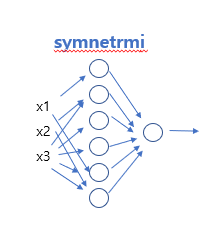

이렇게 많은 신경망이 있어도 수학적 귀납법에 의해 w의 값을 모두 0으로 초기화 할 경우 두 은닉 유닛이 같은 함수를 계산하는 것으로 싲가하기 때문에 두 은닉 유닛이 출력 유닛에 항상 같은 영향을 주게 되고, 첫번째 반복 이후에 같은 상태가 계속 반복 되며, 두 은닉 유닛은 계속 대칭적으로 신경망이 얼마나 많은 훈련을 하는지에 상관 없이 항상 같은 함수를 가진다

(항상 같은 것을 계산하기 때문에 은닉 유닛이 실제로는 한개라고 할 수 있다)

##해결방법

모든 값을 0으로 초기화 한다면 모든 은닉 유닛은 대칭이 되어 경사하강법을 얼마나 적용시키는지에 상관 없이 모든 유닛은 항상 같은 함수를 계산하여 쓸모 없게 된다

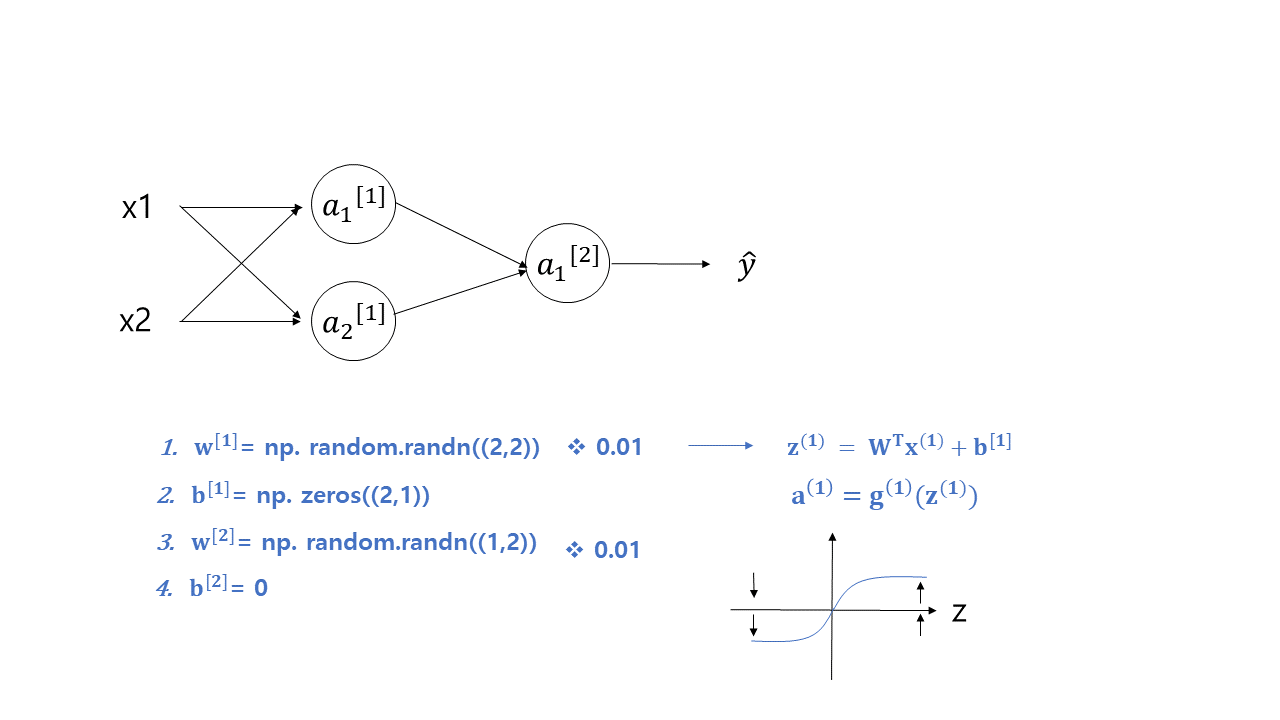



1.   $w^{[1]}$를 np.random.randn(2,2)으로 설정
*   가우시안 랜덤 변수를 생성
*   0.01과 같은 굉장히 작은 수를 곱해 작은 임의의 수를 초기값으로 만든다
2.  $b^{[1]}$는 위에 대칭문제를 가지 않아 대칭 회피문제라고 부르면, 이때의 $b^{[1]}$의 초기값은 0으로 해도 상관 없다
3. $w^{[2]}$도 $w^{[1]}$와 유사하게 임의의 값으로 초기화 한다
4. $b^{[2]}$도 0으로 최기화 하면 된다



##### 0.01을 곱하는 이유

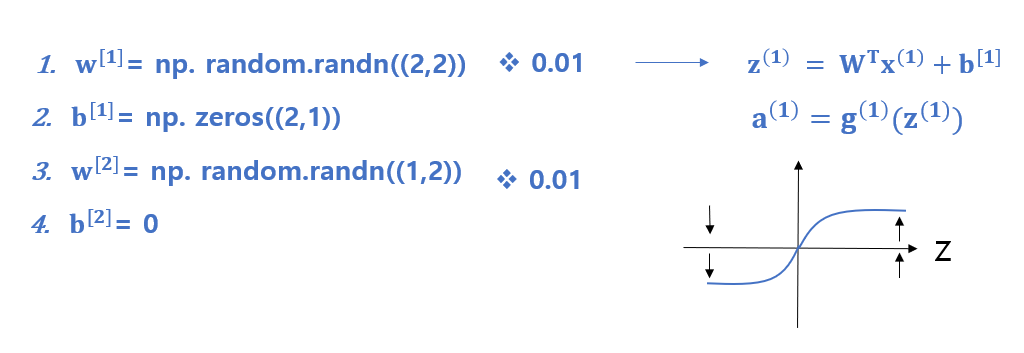

*   tanh함수 또는 시그모이드 활성 함수를 사용하거나 출력층에서 시그모이드 형태를 사용한다고 하면

 $z^{[1]} = w^{[1]}x + b^{[1]}$이고

  활성함수$a^{[1]}$은 $z^{[1]}$에 대한 값을 가진다

*   w가 큰 값을 가지는 경우에 z도 굉장히 큰 값을 가진다

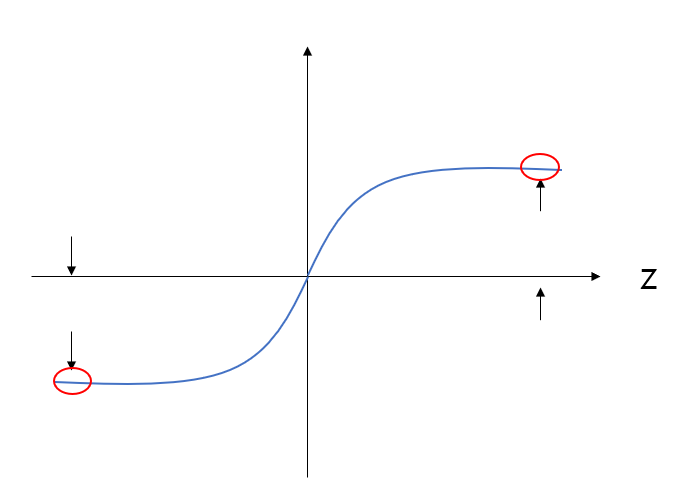



*   tanh이나 시그모이드 함수에서 두꺼운부분(빨간색 동그라미 부분)은 경사의 기울기가 매우 낮기 때문에, 경사 하강법또한 매우 느려진다 

   즉 w가 너무 큰 값을 가지면 z가 매우 큰 값을 이용해 훈련하게 되어 학습속도가 느려진다


###### 정리

w(가중치 값)가 너무 큰 값을 가지면 매우 큰 값의 z를 이용해 훈련을 시작하게 되고, tanh나 시그모이드 활성함수가 너무 큰 값을 가지게 되어 학습 속도가 느려진다. 하지만 시그모이드 또는 tanh활성 함수를 신경망에 적용하지 않는 경우에는 학습속도가 느려지는 문제는 적겠지만 이진분류의 경우에는 출력 유닛이 시그모이드 함수이므로 초기 변수들이 너무 큰 값을 가지지 않게 해야된다.


# 참고

https://youtu.be/6by6Xas_Kho?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0